In [16]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
import numpy as np
import scipy
import seaborn as sns
import re
from tqdm.notebook import tqdm
import json

#IMPORTING FUNCTIONS FOR CLASSIFIERS
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, TimeSeriesSplit, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

#IMPORTING FUNCTIONS FOR CLASSIFIERS METRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#OPTMIZE PARAMETHERS
import optuna

#IMPORTING FUNCTIONS FROM ./defs

from defs import defs_

In [17]:
#PATHS USED
path_quick_test = [
    "./database_raw/DatasetA/zzzAD1.txt",
    "./database_raw/DatasetA/zzzAD30.txt",
    "./database_raw/DatasetA/zzzAD12.txt",
    "./database_raw/DatasetA/zzzAU.txt",
];
path = glob.glob("./database_raw/DatasetA/zzzA*.txt", recursive=True);
pathB = glob.glob("./database_raw/DatasetB/zzzB*.txt", recursive=True);

# Qty of row to be aggrouped 
samples = 1024;

qty_coef = 30;

# Importing Database

In [3]:
samples = 1024;

df_final = pd.read_csv('df_csv/' + str(samples) + '_samples/df_reg_coef/dataframe_regression_coef_' + str(qty_coef) + '_final', index_col=0, dtype='unicode');
# df_quick_test = pd.read_csv('df_csv/' + str(samples) + '_samples/dataframe_regression_coef_' + str(qty_coef) + '_simples', index_col=0, dtype='unicode');
dfB_final = pd.read_csv('df_csv/' + str(samples) + '_samples/df_reg_coef/dataframeB_regression_coef_' + str(qty_coef) + '_final', index_col=0, dtype='unicode');

result_params = pd.read_csv('results_final_coef_'+str(qty_coef)+'.csv', index_col=0, dtype='unicode');
result_params

,Sensor,acc_cross,acc_sem,pod,param,acc_com_cross_optuna,acc_sem_cross_optuna,pod_optuna
0,S1,0.9941,0.9805,1.0000,"{'max_features': 11, 'max_depth': 29}",0.9922,0.9805,1.0000
1,S10,0.9980,1.0000,1.0000,"{'max_features': 7, 'max_depth': 25}",0.9980,1.0000,1.0000
2,S11,0.9941,0.9935,1.0000,"{'max_features': 14, 'max_depth': 42}",0.9922,0.9935,1.0000
3,S12,0.9922,1.0000,1.0000,"{'max_features': 1, 'max_depth': 44}",0.9902,1.0000,1.0000
4,S13,0.9648,0.9610,1.0000,"{'max_features': 1, 'max_depth': 25}",0.9687,0.9610,0.9961
5,S14,0.9922,1.0000,1.0000,"{'max_features': 8, 'max_depth': 39}",0.9902,1.0000,1.0000
6,S15,0.9804,0.9870,0.9961,"{'max_features': 7, 'max_depth': 50}",0.9824,0.9870,0.9922
7,S16,1.0000,1.0000,1.0000,"{'max_features': 3, 'max_depth': 17}",1.0000,1.0000,1.0000
8,S17,0.9980,1.0000,1.0000,"{'max_features': 9, 'max_depth': 5}",0.9980,1.0000,0.9883
9,S18,1.0000,1.0000,1.0000,"{'max_features': 15, 'max_depth': 27}",1.0000,0.9935,0.9922


# Criando dataframe voltada para 1 sensor

In [18]:
df_ready = defs_.createScaledDataframeScenario(df_final, 12);

df_ready

,coeff_0_S12,coeff_1_S12,coeff_2_S12,coeff_3_S12,coeff_4_S12,coeff_5_S12,coeff_6_S12,coeff_7_S12,coeff_8_S12,coeff_9_S12,...,coeff_21_S12,coeff_22_S12,coeff_23_S12,coeff_24_S12,coeff_25_S12,coeff_26_S12,coeff_27_S12,coeff_28_S12,coeff_29_S12,damaged
0,-0.18739007371327565,-0.30067089633824423,-0.36617469166222616,-0.13224619785332262,0.11763483230956913,0.057208121745043486,0.14816284830253681,-0.1299863225339677,-0.06378907991739051,0.1961060860213024,...,0.24423026811878565,0.15140639974929376,0.4570785676005871,-0.3686908156120217,-0.21375581864465862,-0.3311356118882124,0.4753779487450023,0.038457275557718384,-0.20974814462009347,1
1,-0.0918934167337233,-0.040197135396538596,-0.30284501435740924,-0.10783756901571344,0.045796608305683356,0.13527653454022445,0.14247687299039888,0.06035411286518838,-0.20563451655882753,0.28263394474676556,...,0.37918461957611893,-0.12492738667855274,0.5505089606965335,-0.5679051406903974,-0.1776934649457984,-0.41584600637807834,0.520954535826203,-0.07714191834595738,-0.039558559211911246,1
2,-0.04416639155033047,-0.1658714721855391,-0.3148666822713877,-0.1248962542663345,0.1057842889697338,0.0779585663032401,0.19277908516368505,-0.1200253925256241,-0.11533981286039223,0.18839774254866473,...,0.15951650701794912,-0.010401951448257056,0.4234937478593625,-0.4216207166125934,-0.2593235491624374,-0.43924199397492697,0.4074205424347174,0.03438348973989999,-0.12043354054873359,1
3,-0.06557934531602011,-0.11134581452059582,-0.3810216287532554,-0.09684133993167338,0.07270148400375832,0.05759593807159962,0.1300106784818368,-0.05177349839303291,-0.06631166943041829,0.21478210638688472,...,0.245476160575476,0.036002420609506355,0.41385710640912443,-0.5770438051998629,-0.2174884249944727,-0.2961791340325917,0.48675363213750855,-0.07229043899264251,-0.15265113425792087,1
4,-0.06617142377599815,-0.1791223771372897,-0.3899273411012969,-0.20115483728744535,0.09751455799637636,0.11590993246455113,0.06538028500097809,-0.1766373763363073,-0.21828285327935734,0.16357121380565412,...,0.31999545402933804,0.0073706401387674,0.4522547738334767,-0.5800744777489998,-0.20474720254319423,-0.4825200377118464,0.4350051872501886,-0.01415198785502793,-0.15437620434735885,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-0.0596039859052764,-0.03298056426815026,-0.391801676071699,-0.13898277896688685,-0.013729100581365878,0.17069427125463177,-0.06148769221415783,0.16185810622093164,-0.16737958758680108,0.3015408234173453,...,0.185188748053553,-0.19786795446324207,0.5070349627957234,-0.22643305657139232,-0.14929098019920664,-0.44257784520996835,0.4058454270890566,0.09350242142152036,-0.07639510196126903,0
508,-0.0620519440156616,-0.14016357841262295,-0.3503835192583846,-0.22719123117381707,-0.09122842661850618,0.04586869574787889,0.06345787906806727,0.009217092823995946,-0.012502988227369095,0.22152513391641868,...,0.2929521916348576,-0.2569390649709769,0.4200388566399063,-0.3363331984265058,0.13895557722547408,-0.32851224397065415,0.37290887010094653,-0.20952704436885594,-0.058423308186689386,0
509,-0.17700955930698023,-0.2509440914443446,-0.3862107473967514,-0.21274493941985576,-0.05000887506800434,0.02460256339049895,0.0021235143860882265,0.15547930874579466,-0.03181782766108837,0.05696463825720272,...,0.17476995103852627,-0.22097557790013667,0.5200836136580625,-0.27921887793256545,-0.14633477133646283,-0.35784044727992287,0.36087961015542197,-0.20514997074874453,-0.24212129007479344,0
510,-0.08935377308625521,-0.10720270075409925,-0.32790657250346633,-0.28610547831729954,-0.1800898235478437,-0.06274418078168512,0.12270436244699437,0.0420482004048239,-0.21912109761009438,0.040932256383646955,...,0.2828350110351112,-0.05416784997903886,0.3501826584979877,-0.3776826620003332,-0.05301858869511211,-0.3364324599238613,0.34415881540737703,-0.29327788252442566,-0.1242040981323841,0


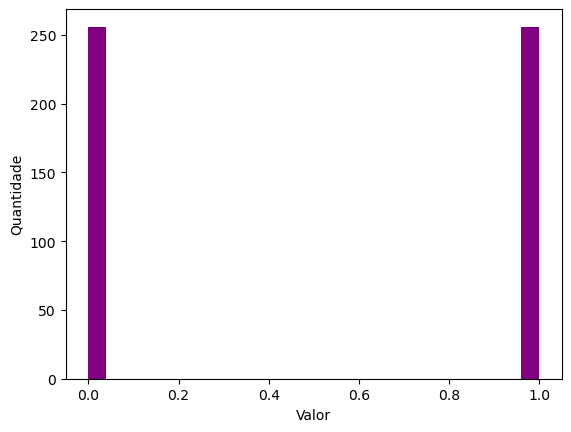

In [23]:
# Check values from database's target 
plt.figure()
plt.xlabel('Valor');
plt.ylabel('Quantidade');

plt.hist(df_ready['damaged'].astype(int),bins = 25,color='purple');

In [25]:
df_ready = defs_.createDatabaseSingleSensor(df_final, 12);

df_ready

,coeff_0_S12,coeff_1_S12,coeff_2_S12,coeff_3_S12,coeff_4_S12,coeff_5_S12,coeff_6_S12,coeff_7_S12,coeff_8_S12,coeff_9_S12,...,coeff_21_S12,coeff_22_S12,coeff_23_S12,coeff_24_S12,coeff_25_S12,coeff_26_S12,coeff_27_S12,coeff_28_S12,coeff_29_S12,damaged
0,-0.04608915447995069,-0.12478324430287273,-0.3042673959589848,-0.3058518709518394,-0.0016875587559700943,0.042938910328065634,0.16921497196374924,0.04709877408690206,-0.005978750261147734,0.044328954260986674,...,0.18957420799568167,-0.02135750908486253,0.45339202169100695,-0.3585423742096454,-0.0669009493367399,-0.39488044460856986,0.3393070544834163,-0.20777014158728732,-0.17303968828856536,0
1,-0.2242916548330281,-0.15985798091772743,-0.2700152184265553,-0.1772825981171573,-0.09204577949195097,-0.08746847395157421,0.03758898939954998,0.11406555083910513,-0.0528022051991904,0.1038002835987894,...,0.18026669339064966,-0.15127243463151738,0.4240766871948447,-0.24485559370251941,-0.003580848374850404,-0.4032248392516689,0.19398618867201292,-0.33870269834495653,-0.11204058239671309,0
2,-0.14424059146174673,-0.19056850604589942,-0.3090933583778664,-0.10390880056201864,-0.10465015291922404,0.12431958503587011,0.017025444188418063,0.23490455432317278,-0.01847511178882493,0.25110699810497555,...,0.17787466953736872,-0.10768434937538021,0.3135652792685261,-0.30048784775887716,-0.11182874881025472,-0.398062818052052,0.1940526602707335,-0.4032362155858388,-0.2510137460070407,0
3,-0.1883148496020194,-0.24846712082154504,-0.4147276944710687,-0.26301144428468165,-0.03126687054950736,0.02352169771600841,0.15443873741671757,0.15509915887437956,0.02113539170381851,0.16833882136570613,...,0.2271441077710009,-0.008439883604057756,0.40196002906699674,-0.2443731715523259,-0.005431145528316375,-0.19021425595256986,0.31758093873140786,-0.38526020447193804,-0.2963584913198311,0
4,-0.04982291013313265,-0.09252336210970596,-0.4066996923901313,-0.26266535593800533,-0.1266097383431047,0.0528516962765673,0.05919711249242721,0.13387116806275193,-0.07161463919714427,0.0964249191955726,...,0.28252633406193906,-0.022169757709548987,0.45494904444325335,-0.2925352048683833,0.039483433215199926,-0.28612630129958927,0.4132602864383256,-0.27629730065999736,-0.1918144524043806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,-0.117043799313543,-0.2259282018826147,-0.3976155142566322,-0.16583984955198403,-0.1542221995082989,-0.07625251508434293,0.01247973064115201,0.15219709459460753,-0.07574184995103772,0.07405324701840083,...,0.06471734532974333,-0.07131603248814868,0.41188088314792204,-0.24973672451382956,-0.21333465301947505,-0.3581602998906908,0.30574232486698344,-0.06223494348473742,-0.32950826316681153,0
7932,-0.05942383413381463,-0.2243033866642479,-0.3615648885512541,-0.24665033583590576,-0.040250416328498455,-0.07133191162909513,0.05619130974215284,0.06970534294180114,-0.06299853906123234,0.06228091265279947,...,0.098167278172826,-0.18854838462194357,0.6162886914664796,-0.22042708121614887,-0.11615863890087236,-0.4050410562554537,0.39776367961637454,-0.03869138214138727,-0.15460344667387715,0
7933,-0.10412433390127299,-0.2416376702479374,-0.4399468717547742,-0.17375891809217395,-0.1584582384158611,-0.06400293117138676,-0.019195358835117807,0.1895790979076917,-0.13339181287374136,0.009210715338409442,...,0.14564320098362346,-0.20783232379757607,0.5995718110465239,-0.27592668097507145,-0.1345446776674689,-0.4777431650779135,0.3728443907595357,-0.11875254328507716,-0.24040379311217783,0
7934,-0.21129369985293955,-0.2903524264844925,-0.43200464986143267,-0.19474597259584628,-0.14674560760094404,-0.12085125808533395,0.04072057158820986,0.1856431231492553,-0.09027015826172584,-0.04425926325505406,...,0.04542850603552957,-0.087420928818546,0.48292908852256133,-0.2654863588589054,-0.20585498859232096,-0.36045620902562675,0.29405144545962747,-0.18266906702060112,-0.33444835551692514,0


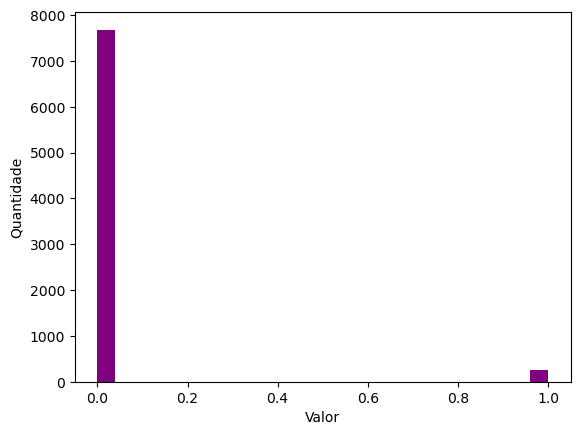

In [26]:
# Check values from database's target 
plt.figure()
plt.xlabel('Valor');
plt.ylabel('Quantidade');

plt.hist(df_ready['damaged'].astype(int),bins = 25,color='purple');

# Modelo sem Cross validation

### Preparação dos inputs e target

In [11]:
### Setting X and y for model score:0.5545965387932191

print('Scenario is: ' + str(1))

# Setting target variable
y_new_attemp = df_ready['damaged'];
y_new_attemp = y_new_attemp.astype(int);

# Setting other variables
X_new_attemp = df_ready.drop(columns=['damaged']);
X_new_attemp = X_new_attemp.astype(float);

# Separate database for test and train and 
X_train, X_test, y_train, y_test = train_test_split(X_new_attemp, y_new_attemp, test_size=0.3, shuffle=True);

#Scale df
std_scaler = StandardScaler()
X_scaled_train = X_train;
X_scaled_test = X_test;
# X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index);
# X_scaled_test = pd.DataFrame(std_scaler.transform(X_test),columns=X_train.columns,index=X_test.index);

print('X_scaled_train, y_train e X_scaled_test, y_test estão prontos.')

Scenario is: 1
X_scaled_train, y_train e X_scaled_test, y_test estão prontos.


### Treinando modelo sem otimização

In [12]:
### DEFAULT PARAMETHERS ON FULL DATAFRAME
rf_sem_cross = RandomForestClassifier(n_estimators = 100,max_features= 1, max_depth= 17);
rf_sem_cross.fit(X_scaled_train,y_train);

### Predict df test
y_pred = rf_sem_cross.predict(X_scaled_test);
accuracy_test = accuracy_score(y_test, y_pred);
print('Preformance de previsão de df de teste: ' + "{:.4f}".format(accuracy_test))

## Predict df train (overfit)
y_pred_ss = rf_sem_cross.predict(X_scaled_train);
accuracy_train = accuracy_score(y_train, y_pred_ss);
print('Performance de previsão de df de treino: ' + "{:.4f}".format(accuracy_train))
if (accuracy_train > accuracy_test) :
    print('-> overfit(?)')

Preformance de previsão de df de teste: 1.0000
Performance de previsão de df de treino: 1.0000


In [163]:
a = (confusion_matrix(y_test, y_pred))
print(a)

[[78  2]
 [ 0 74]]


In [164]:
### OPTMAZING PARAMETHERS TO MAXIMIZE SCORE ON QUICK DATAFRAME {'n_estimators': 800, 'max_depth': 2}
### last score: 0.5761515497421756

def objective(trial):
    ### PARAMS
    # param_n_estimators = trial.suggest_int('n_estimators',100,100000,100);
    param_max_features = trial.suggest_int('max_features',1,8,1);
    param_max_depth = trial.suggest_int('max_depth',1,20,1);
    # param_min_samples_split = trial.suggest_int('min_samples_split',1,20,1);

    rf_com_cross_optuna = RandomForestClassifier(n_estimators = 100, max_features=param_max_features, max_depth=param_max_depth);
    score_new_attemp = cross_val_score(rf_com_cross_optuna, X_scaled, y_new_attemp);

    return np.mean(score_new_attemp)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

study.best_params

[I 2023-06-06 14:45:04,300] A new study created in memory with name: no-name-1911fc54-6a61-4102-8b99-b61d05afae42
[I 2023-06-06 14:45:04,793] Trial 0 finished with value: 0.9941366837997336 and parameters: {'max_features': 7, 'max_depth': 5}. Best is trial 0 with value: 0.9941366837997336.
[I 2023-06-06 14:45:05,260] Trial 1 finished with value: 0.9941366837997336 and parameters: {'max_features': 6, 'max_depth': 12}. Best is trial 0 with value: 0.9941366837997336.
[I 2023-06-06 14:45:05,675] Trial 2 finished with value: 0.996078431372549 and parameters: {'max_features': 2, 'max_depth': 3}. Best is trial 2 with value: 0.996078431372549.
[I 2023-06-06 14:45:06,117] Trial 3 finished with value: 0.9960974681134591 and parameters: {'max_features': 3, 'max_depth': 13}. Best is trial 3 with value: 0.9960974681134591.
[I 2023-06-06 14:45:06,613] Trial 4 finished with value: 0.9941366837997336 and parameters: {'max_features': 4, 'max_depth': 8}. Best is trial 3 with value: 0.9960974681134591.
[

{'max_features': 1, 'max_depth': 17}

In [165]:
optuna.visualization.plot_optimization_history(study)

# Modelo com Cross validation

### Preparação dos inputs e target

In [168]:
### Setting X and y for model

print('Scenario is: ' + str(1))

# Setting target variable
y_new_attemp = df_ready['damaged'];
y_new_attemp = y_new_attemp.astype(int);

# Setting other variables
X_new_attemp = df_ready.drop(columns=['damaged']);
X_new_attemp = X_new_attemp.astype(float);

X_scaled = X_new_attemp;

print('X_scaled e y_new_attemp estão prontos.')

Scenario is: 1
X_scaled e y_new_attemp estão prontos.


### Treinando modelo sem otimização

In [169]:
### DEFAULT PARAMETHERS ON FULL DATAFRAME
rf_com_cross = RandomForestClassifier(n_estimators = 100,max_features= 1, max_depth= 17);
score_new_attemp = cross_val_score(rf_com_cross, X_scaled, y_new_attemp);

print('Performance da media das validações cruzadas: ' + "{:.4f}".format(np.mean(score_new_attemp)))

Performance da media das validações cruzadas: 0.9980


# Modelo Validação com datasetB

## Preparando dataset B

In [7]:
pathB

['./database_raw/DatasetB\\zzzBD1.TXT',
 './database_raw/DatasetB\\zzzBD10.TXT',
 './database_raw/DatasetB\\zzzBD11.TXT',
 './database_raw/DatasetB\\zzzBD12.TXT',
 './database_raw/DatasetB\\zzzBD13.TXT',
 './database_raw/DatasetB\\zzzBD14.TXT',
 './database_raw/DatasetB\\zzzBD15.TXT',
 './database_raw/DatasetB\\zzzBD16.TXT',
 './database_raw/DatasetB\\zzzBD17.TXT',
 './database_raw/DatasetB\\zzzBD18.TXT',
 './database_raw/DatasetB\\zzzBD19.TXT',
 './database_raw/DatasetB\\zzzBD2.TXT',
 './database_raw/DatasetB\\zzzBD20.TXT',
 './database_raw/DatasetB\\zzzBD21.TXT',
 './database_raw/DatasetB\\zzzBD22.TXT',
 './database_raw/DatasetB\\zzzBD23.TXT',
 './database_raw/DatasetB\\zzzBD24.TXT',
 './database_raw/DatasetB\\zzzBD25.TXT',
 './database_raw/DatasetB\\zzzBD26.TXT',
 './database_raw/DatasetB\\zzzBD27.TXT',
 './database_raw/DatasetB\\zzzBD28.TXT',
 './database_raw/DatasetB\\zzzBD29.TXT',
 './database_raw/DatasetB\\zzzBD3.TXT',
 './database_raw/DatasetB\\zzzBD30.TXT',
 './database_raw/Da

In [8]:
path_used = pathB[22];
df_scenario = defs_.createDatabase(path_used);
df_scenario = df_scenario.astype(float);
# [index,    'Time',      'S1'  , ..., 'Scenario']
# [  0,     0.000000,   0.004954, ...,     1.0   ]
# [ ...,       ...,        ...  , ...,     ...   ]
# [ 262k,   255.9999,  -0.211089, ...,     1.0   ]
scenario = defs_.getDamageScenarioLabel(path_used);
print('Scenario is: ' + str(scenario));

sensor = 3;
sensor_label = 'S'+ str(sensor);
df_scenario_S1 = defs_.getRegressionCaracteristics(df_scenario,sensor_label,qty_coef=8);
df_scenario_S1 = df_scenario_S1.astype(float);

df_scenario_S1

Scenario is: 3


,coeff_0_S3,coeff_1_S3,coeff_2_S3,coeff_3_S3,coeff_4_S3,coeff_5_S3,coeff_6_S3,coeff_7_S3
0,-0.473992,0.251615,-0.280612,0.286289,-0.058420,0.307501,-0.468676,0.136098
1,-0.489930,0.239989,-0.338979,0.302104,-0.122001,0.359309,-0.440085,0.171135
2,-0.440592,0.267959,-0.223206,0.237637,-0.074683,0.163866,-0.544992,0.042730
3,-0.455632,0.275365,-0.258465,0.335215,-0.057221,0.369332,-0.417137,0.139216
4,-0.565896,0.213106,-0.296583,0.254738,-0.076652,0.281653,-0.415500,0.315889
...,...,...,...,...,...,...,...,...
251,-0.440226,0.280743,-0.433749,0.266159,-0.189028,0.396916,-0.410038,0.191862
252,-0.495465,0.220442,-0.349774,0.227349,-0.205475,0.185632,-0.481913,0.087256
253,-0.430710,0.265808,-0.430382,0.155174,-0.309613,0.269506,-0.436774,0.171894
254,-0.441545,0.264782,-0.310056,0.251710,-0.131355,0.267465,-0.443319,0.130840


## Modelo sem Cross validation

### Treinando modelo sem otimização

In [171]:
### Predict df test
y_pred = rf_sem_cross.predict(df_scenario_S1);
print('Probability of damage: ' + "{:.4f}".format(defs_.probabilityOfDamage(y_pred)));

Probability of damage: 1.0000


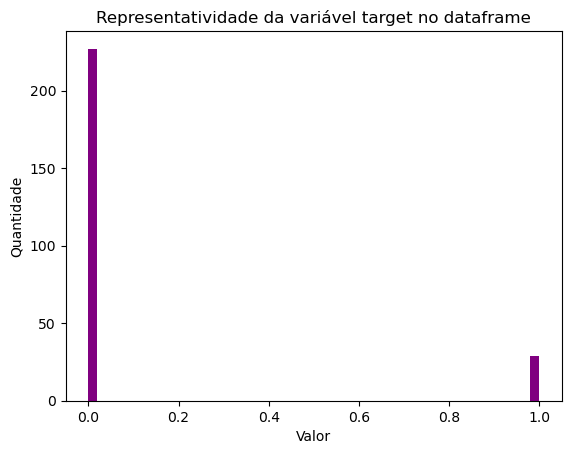

In [94]:
# Check values from database's target 
plt.figure()
plt.title("Representatividade da variável target no dataframe");
plt.xlabel('Valor');
plt.ylabel('Quantidade');

plt.hist(y_pred.astype(int),bins = 50,color='purple');

In [ ]:
a = (confusion_matrix(y_test, y_pred))
print(a)

# Final Validation models

### Create dictionary with model for each sensor

In [4]:
sensor_params_str = result_params.loc[result_params['Sensor'] == 'S'+str(sensor),'param'];

NameError: name 'sensor' is not defined

In [4]:
rf_models = {};
n_est = 500;
max_sampl = 0.8;

for i in tqdm(range(30)):
    sensor = i+1;
    # Creating dataframe for each sensor
    df_ready = defs_.createScaledDataframeScenario(df_final, sensor);
    # [index,  'coeff_0_S1',  ...,  'coeff_0_S7',  'damaged']
    # [  0,    -0.354953579,  ...,  -0.237141094,      1    ]
    # [ ...,        ...,      ...,      ...,          ...,  ]
    # [ 511,   -0.270663599,  ...,   0.004930247,      0    ]
    sensor_params_str = result_params.loc[result_params['Sensor'] == 'S'+str(sensor),'param'];
    sensor_params = eval(sensor_params_str[int(sensor_params_str.index[0])]);
    
    # Setting target variable
    y_new_attemp = df_ready['damaged'];
    # [index,'damaged']
    # [  0,      1    ]
    # [ ...,    ...,  ]
    # [ 511,     0    ]
    y_new_attemp = y_new_attemp.astype(int);

    # Setting other variables
    X_new_attemp = df_ready.drop(columns=['damaged']);
    # [index,  'coeff_0_S1',  ...,  'coeff_0_S7']
    # [  0,    -0.354953579,  ...,  -0.237141094]
    # [ ...,        ...,      ...,      ...,    ]
    # [ 511,   -0.270663599,  ...,   0.004930247]
    X_new_attemp = X_new_attemp.astype(float);

    # Separate database for test and train and 
    X_train, X_test, y_train, y_test = train_test_split(X_new_attemp, y_new_attemp, test_size=0.3, shuffle=True);

    #Scale df
    X_scaled_train = X_train;
    X_scaled_test = X_test;
    # std_scaler = StandardScaler()
    # X_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index);
    # X_scaled_test = pd.DataFrame(std_scaler.transform(X_test),columns=X_train.columns,index=X_test.index);

    ### Create rf model for sensor
    rf = RandomForestClassifier(n_estimators = n_est, bootstrap=True, max_samples=max_sampl, max_features= sensor_params['max_features'], max_depth= sensor_params['max_depth']);
    rf.fit(X_scaled_train,y_train);

    rf_models["Sensor_S"+str(sensor)] = rf;

rf_models

  0%|          | 0/30 [00:00<?, ?it/s]

{'Sensor_S1': RandomForestClassifier(max_depth=29, max_features=11, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S2': RandomForestClassifier(max_depth=30, max_features=16, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S3': RandomForestClassifier(max_depth=6, max_features=3, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S4': RandomForestClassifier(max_depth=29, max_features=2, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S5': RandomForestClassifier(max_depth=3, max_features=1, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S6': RandomForestClassifier(max_depth=49, max_features=1, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S7': RandomForestClassifier(max_depth=45, max_features=6, max_samples=0.8,
                        n_estimators=500),
 'Sensor_S8': RandomForestClassifier(max_depth=22, max_features=1, max_samples=0.8,
                        n_e

In [6]:
array_total = [];

for i in range(6):
    array_row = [];
    for j in range(5):
        junta = (i*5)+(j+1);
        array_row.append(pod_scenario["Junta_"+str(junta)]);
    array_total.append(array_row);

array_total

0
1
2
3
4


### Probability of damage

  0%|          | 0/31 [00:00<?, ?it/s]

Scenario is: 1


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 1.0, 'Junta_2': 0.0, 'Junta_3': 0.0, 'Junta_4': 0.00390625, 'Junta_5': 0.0078125, 'Junta_6': 0.0078125, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.00390625, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.02734375, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.02734375, 'Junta_30': 0.0}


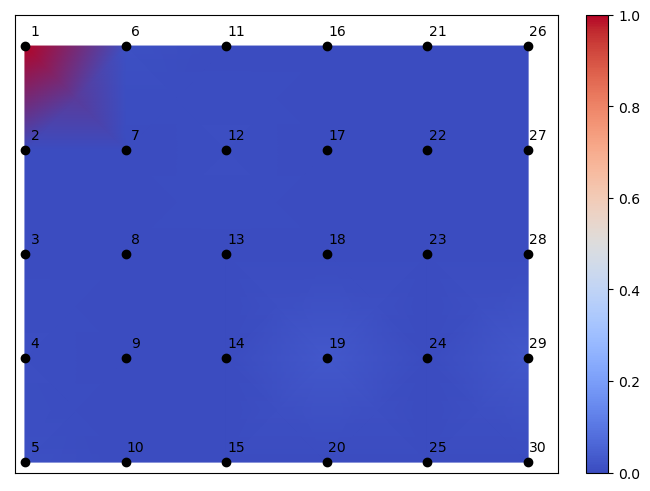

Scenario is: 10


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0, 'Junta_3': 0.0, 'Junta_4': 0.0078125, 'Junta_5': 0.015625, 'Junta_6': 0.0, 'Junta_7': 0.0234375, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.99609375, 'Junta_11': 0.01171875, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.10546875, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.7734375, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


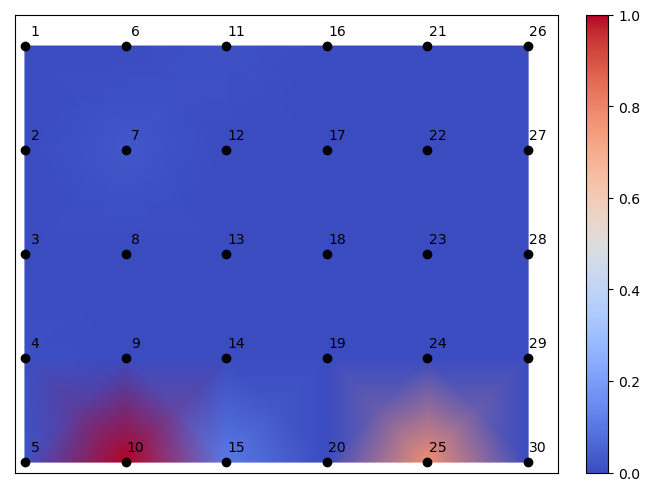

Scenario is: 11


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0078125, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0234375, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.00390625, 'Junta_10': 0.0, 'Junta_11': 1.0, 'Junta_12': 0.0, 'Junta_13': 0.02734375, 'Junta_14': 0.0, 'Junta_15': 0.00390625, 'Junta_16': 0.00390625, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.01171875, 'Junta_22': 0.0, 'Junta_23': 0.00390625, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.00390625, 'Junta_30': 0.0}


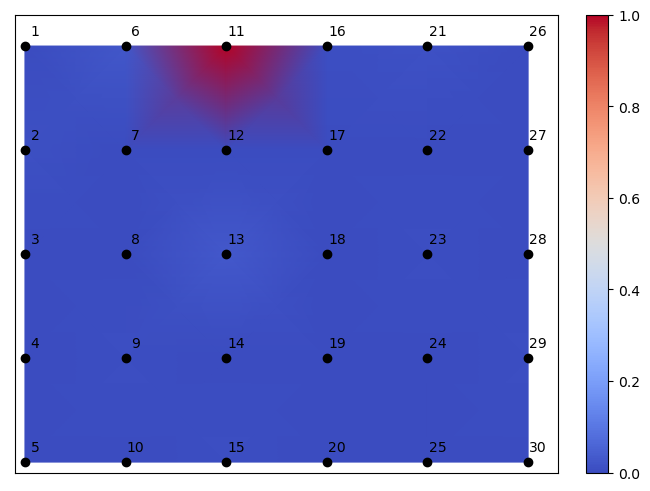

Scenario is: 12


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0078125, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.1953125, 'Junta_8': 0.0, 'Junta_9': 0.01171875, 'Junta_10': 0.0, 'Junta_11': 0.0703125, 'Junta_12': 1.0, 'Junta_13': 0.109375, 'Junta_14': 0.0390625, 'Junta_15': 0.1640625, 'Junta_16': 0.0, 'Junta_17': 0.02734375, 'Junta_18': 0.0, 'Junta_19': 0.28125, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.171875, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.01171875, 'Junta_26': 0.0, 'Junta_27': 0.00390625, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


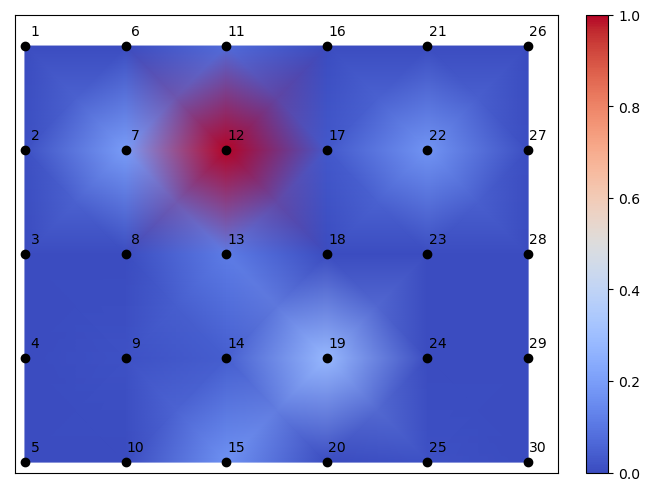

Scenario is: 13


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.1171875, 'Junta_3': 0.0, 'Junta_4': 0.00390625, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.1171875, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.984375, 'Junta_14': 0.00390625, 'Junta_15': 0.00390625, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.109375, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.01171875, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.09765625, 'Junta_30': 0.0}


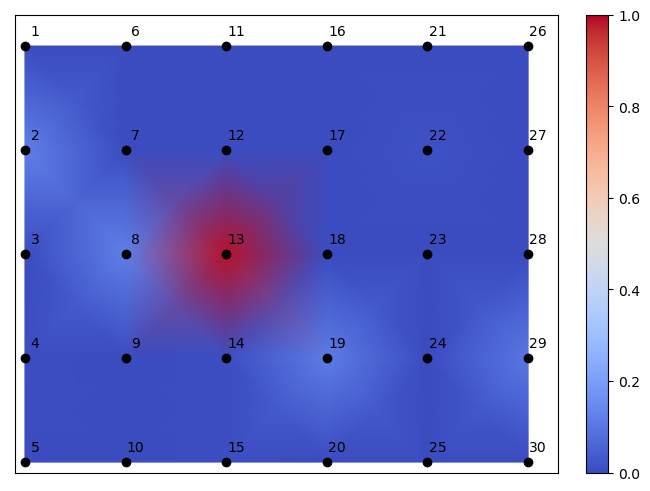

Scenario is: 14


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.171875, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.00390625, 'Junta_11': 0.0, 'Junta_12': 0.00390625, 'Junta_13': 0.3203125, 'Junta_14': 1.0, 'Junta_15': 0.13671875, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.01171875, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.01171875, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.02734375, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0703125, 'Junta_30': 0.03515625}


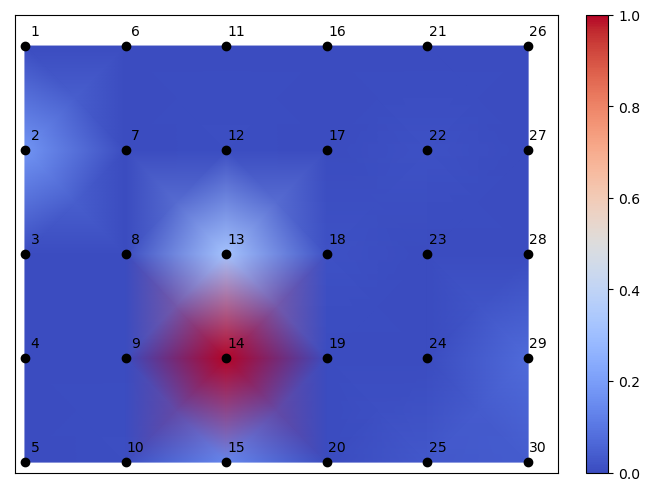

Scenario is: 15


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.00390625, 'Junta_14': 0.0, 'Junta_15': 0.98828125, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0078125, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0078125, 'Junta_24': 0.0, 'Junta_25': 0.4453125, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


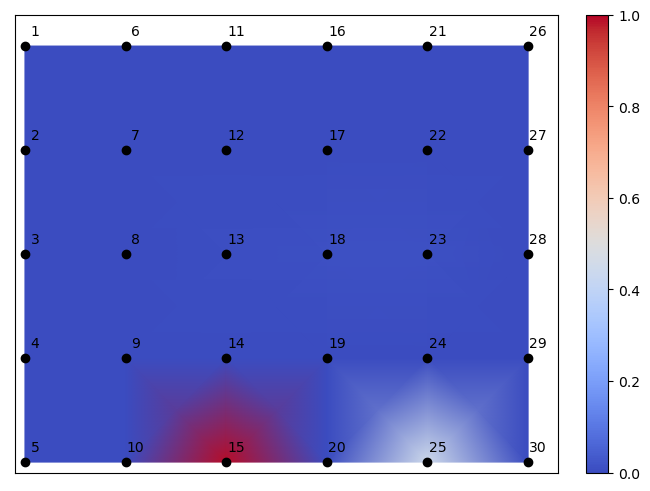

Scenario is: 16


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.1640625, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.00390625, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.12890625, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 1.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.00390625, 'Junta_20': 0.0, 'Junta_21': 0.10546875, 'Junta_22': 0.0, 'Junta_23': 0.01171875, 'Junta_24': 0.0, 'Junta_25': 0.11328125, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.00390625}


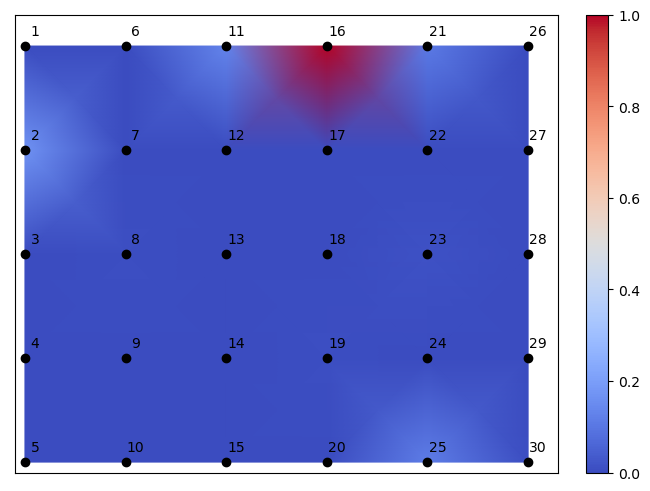

Scenario is: 17


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0234375, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.01171875, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.01953125, 'Junta_14': 0.0, 'Junta_15': 0.00390625, 'Junta_16': 0.0, 'Junta_17': 0.99609375, 'Junta_18': 0.0, 'Junta_19': 0.0234375, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.00390625, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.00390625, 'Junta_28': 0.0, 'Junta_29': 0.0078125, 'Junta_30': 0.0}


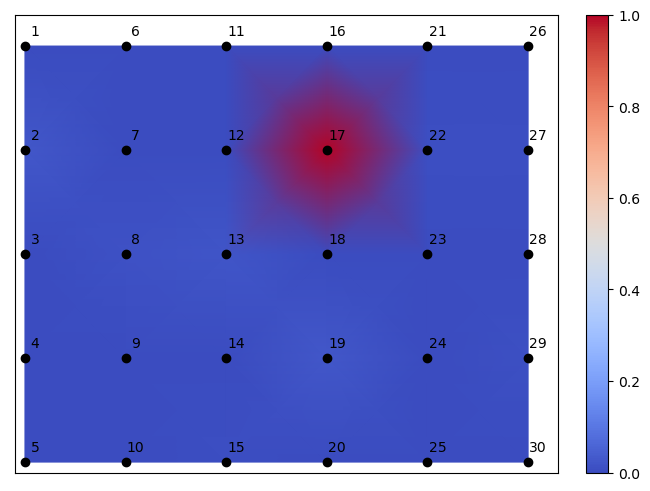

Scenario is: 18


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.03515625, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0625, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.0703125, 'Junta_14': 0.015625, 'Junta_15': 0.0390625, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 1.0, 'Junta_19': 0.0078125, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.01171875, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


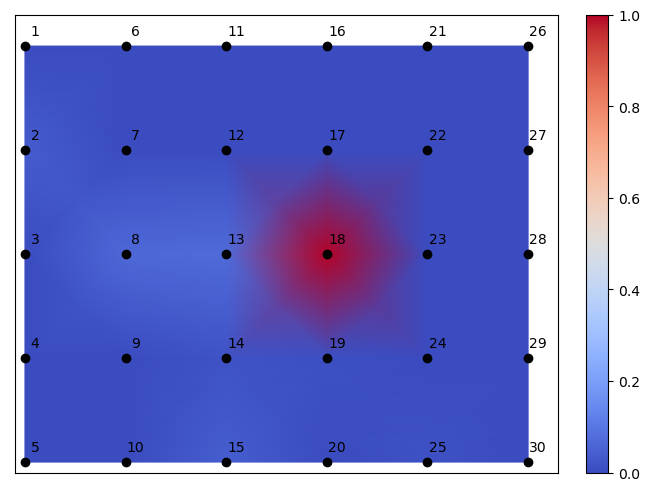

Scenario is: 19


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.09765625, 'Junta_3': 0.0, 'Junta_4': 0.08203125, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0078125, 'Junta_8': 0.00390625, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.00390625, 'Junta_14': 0.015625, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.95703125, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.00390625, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.15625, 'Junta_30': 0.0}


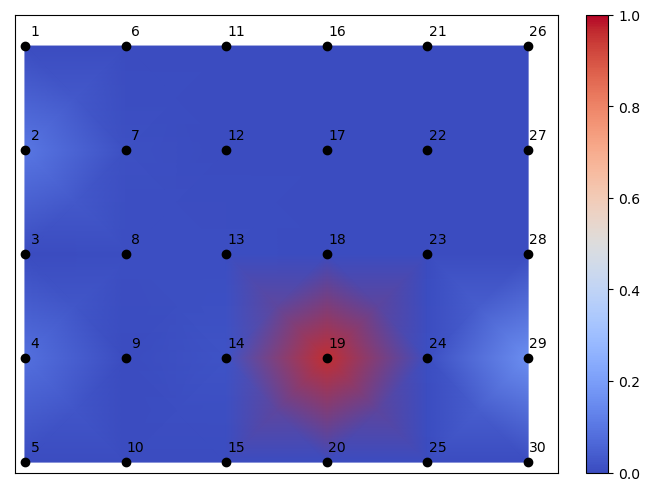

Scenario is: 2


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.9140625, 'Junta_3': 0.0, 'Junta_4': 0.03125, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0078125, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.02734375, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.02734375, 'Junta_20': 0.0, 'Junta_21': 0.0078125, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.1875, 'Junta_30': 0.0}


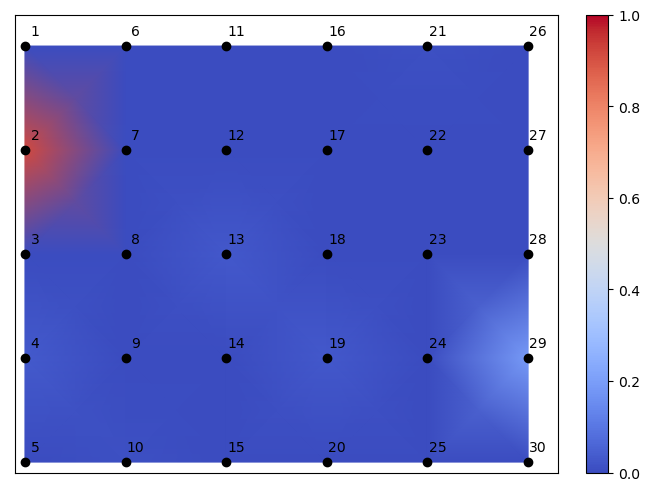

Scenario is: 20


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0078125, 'Junta_8': 0.00390625, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.08984375, 'Junta_15': 0.04296875, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.00390625, 'Junta_19': 0.03125, 'Junta_20': 1.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0078125, 'Junta_26': 0.00390625, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


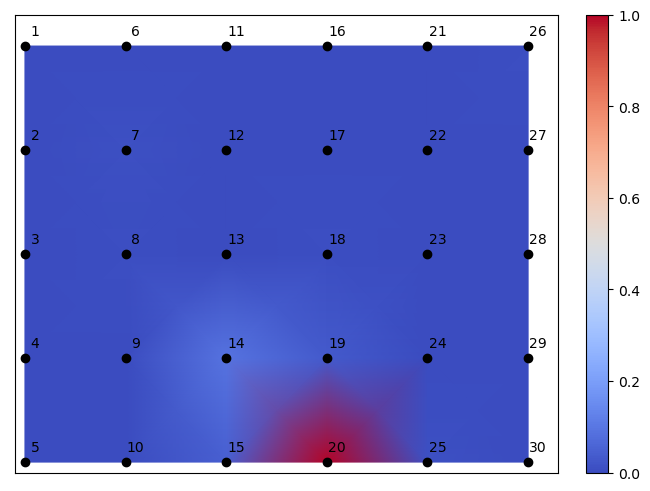

Scenario is: 21


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.15234375, 'Junta_3': 0.0, 'Junta_4': 0.0078125, 'Junta_5': 0.01953125, 'Junta_6': 0.0, 'Junta_7': 0.015625, 'Junta_8': 0.0234375, 'Junta_9': 0.03515625, 'Junta_10': 0.0, 'Junta_11': 0.00390625, 'Junta_12': 0.0, 'Junta_13': 0.05859375, 'Junta_14': 0.0, 'Junta_15': 0.0234375, 'Junta_16': 0.0, 'Junta_17': 0.00390625, 'Junta_18': 0.0, 'Junta_19': 0.00390625, 'Junta_20': 0.0, 'Junta_21': 0.99609375, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0078125, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


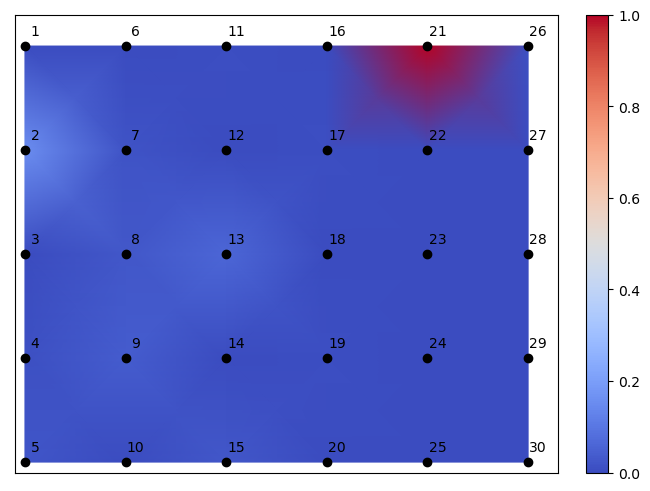

Scenario is: 22


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.02734375, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0390625, 'Junta_8': 0.03515625, 'Junta_9': 0.4296875, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.03125, 'Junta_13': 0.046875, 'Junta_14': 0.0, 'Junta_15': 0.203125, 'Junta_16': 0.00390625, 'Junta_17': 0.41015625, 'Junta_18': 0.02734375, 'Junta_19': 0.10546875, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 1.0, 'Junta_23': 0.0, 'Junta_24': 0.0390625, 'Junta_25': 0.0078125, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.03515625, 'Junta_30': 0.0}


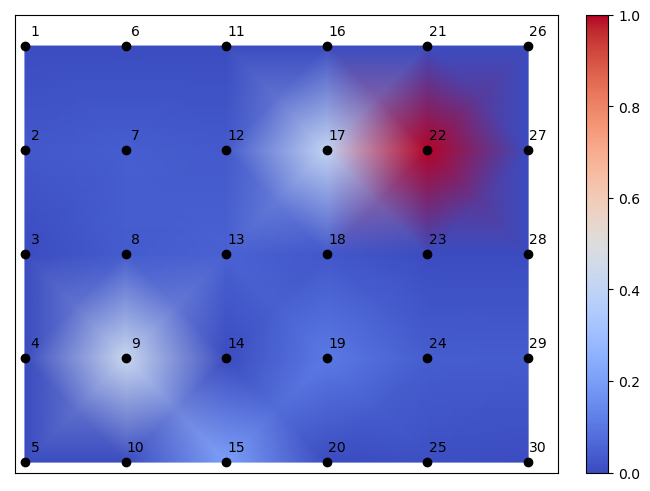

Scenario is: 23


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.5390625, 'Junta_3': 0.0, 'Junta_4': 0.0078125, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.015625, 'Junta_8': 0.14453125, 'Junta_9': 0.00390625, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.2578125, 'Junta_14': 0.0234375, 'Junta_15': 0.0546875, 'Junta_16': 0.0078125, 'Junta_17': 0.0078125, 'Junta_18': 0.02734375, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.00390625, 'Junta_22': 0.08984375, 'Junta_23': 1.0, 'Junta_24': 0.00390625, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


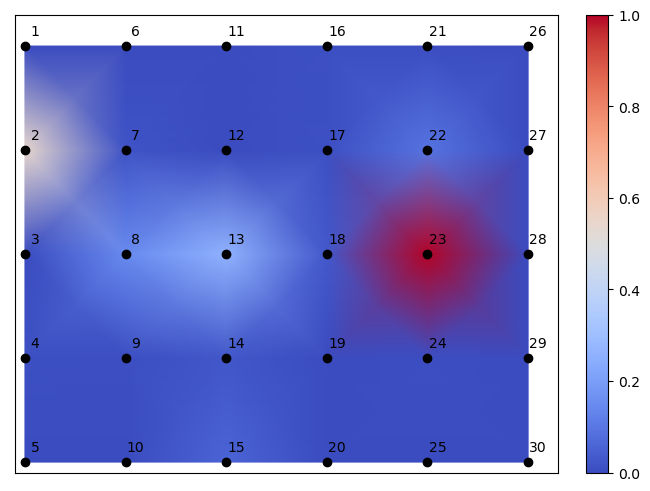

Scenario is: 24


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.08203125, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.03515625, 'Junta_8': 0.0, 'Junta_9': 0.015625, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.00390625, 'Junta_13': 0.0, 'Junta_14': 0.01171875, 'Junta_15': 0.1484375, 'Junta_16': 0.0, 'Junta_17': 0.00390625, 'Junta_18': 0.01953125, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.03125, 'Junta_23': 0.0, 'Junta_24': 1.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.65234375, 'Junta_30': 0.0}


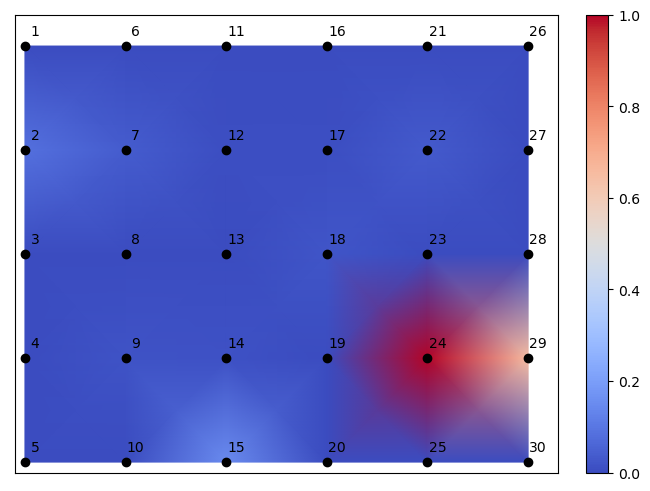

Scenario is: 25


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0859375, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.00390625, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.01171875, 'Junta_15': 0.046875, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.00390625, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.99609375, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.421875}


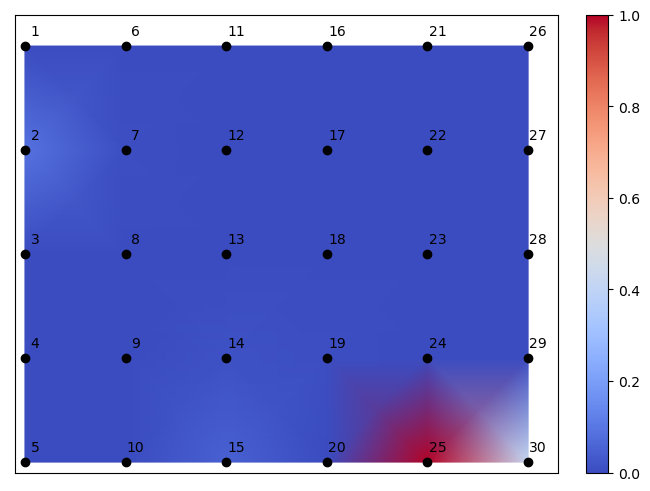

Scenario is: 26


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0234375, 'Junta_3': 0.0, 'Junta_4': 0.0078125, 'Junta_5': 0.01171875, 'Junta_6': 0.00390625, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.01953125, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.01953125, 'Junta_20': 0.0, 'Junta_21': 0.04296875, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 1.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


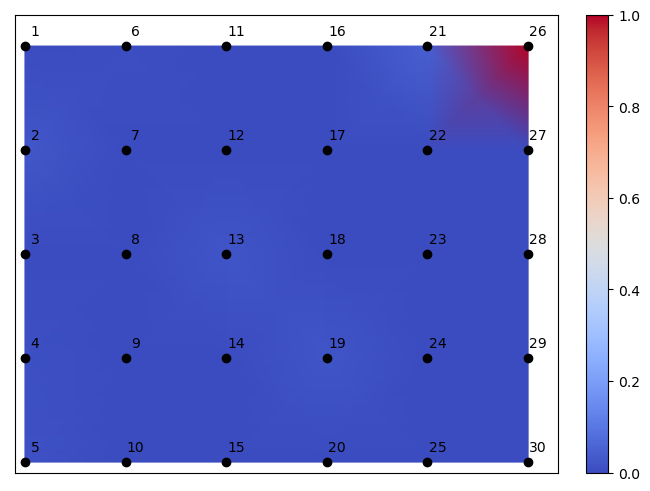

Scenario is: 27


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.33984375, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0078125, 'Junta_12': 0.0, 'Junta_13': 0.03515625, 'Junta_14': 0.00390625, 'Junta_15': 0.45703125, 'Junta_16': 0.0, 'Junta_17': 0.08984375, 'Junta_18': 0.0, 'Junta_19': 0.14453125, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0546875, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 1.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.03515625}


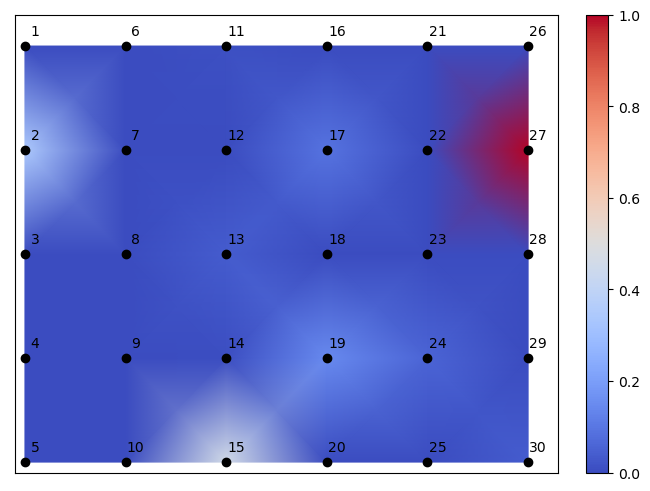

Scenario is: 28


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.1015625, 'Junta_2': 0.0, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.0078125, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.31640625, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 1.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


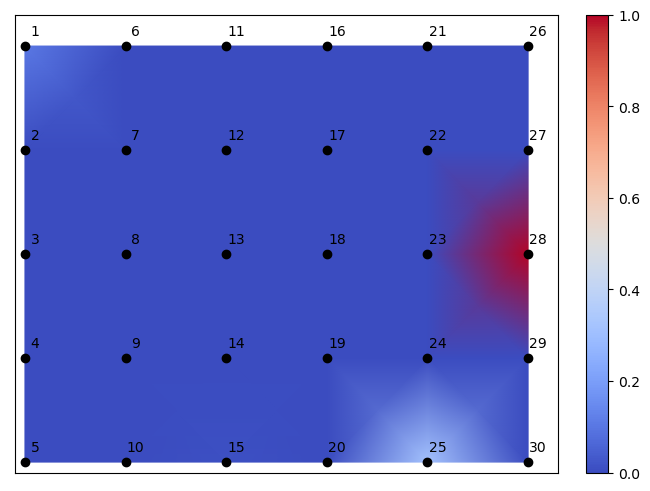

Scenario is: 29


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.3515625, 'Junta_3': 0.0, 'Junta_4': 0.00390625, 'Junta_5': 0.0, 'Junta_6': 0.00390625, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.015625, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.0078125, 'Junta_14': 0.0, 'Junta_15': 0.03515625, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.01171875, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.00390625, 'Junta_23': 0.0, 'Junta_24': 0.01171875, 'Junta_25': 0.046875, 'Junta_26': 0.0, 'Junta_27': 0.00390625, 'Junta_28': 0.0, 'Junta_29': 0.98046875, 'Junta_30': 0.09765625}


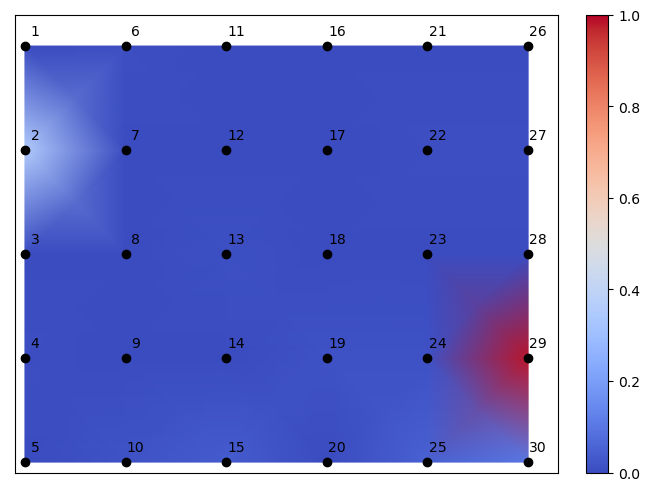

Scenario is: 3


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0078125, 'Junta_2': 0.0, 'Junta_3': 1.0, 'Junta_4': 0.00390625, 'Junta_5': 0.13671875, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.0, 'Junta_20': 0.00390625, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.03515625, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


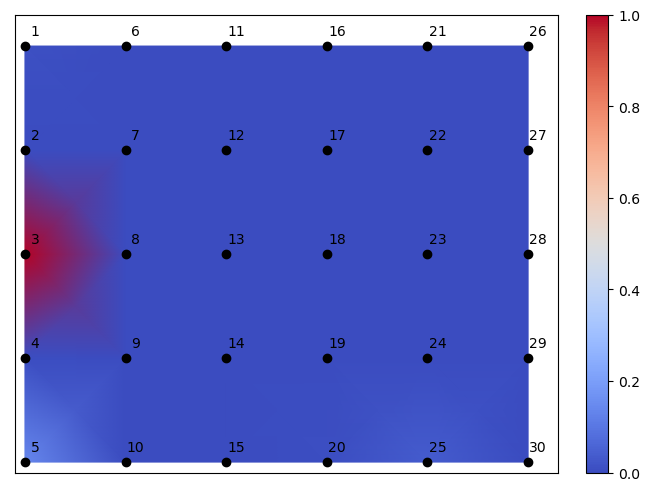

Scenario is: 30


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.3828125, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.0078125, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0390625, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.671875, 'Junta_30': 0.99609375}


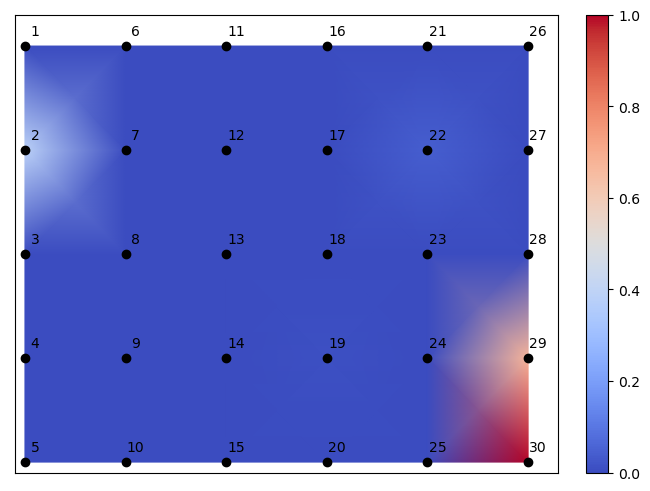

Scenario is: 4


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.046875, 'Junta_3': 0.0, 'Junta_4': 1.0, 'Junta_5': 0.0, 'Junta_6': 0.0703125, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0859375, 'Junta_12': 0.0, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.00390625, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.015625, 'Junta_27': 0.0234375, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


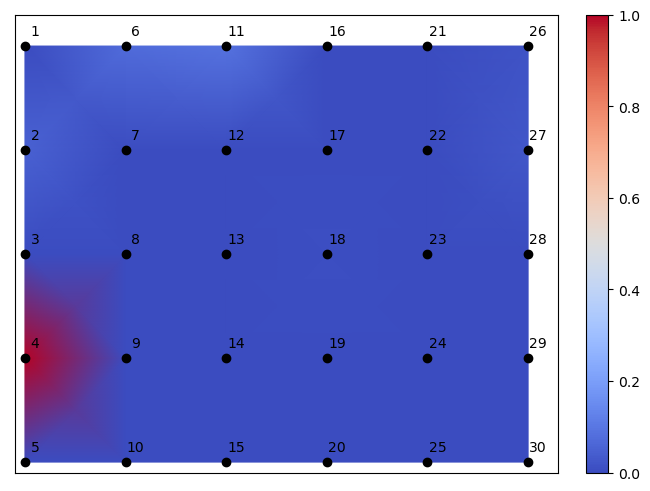

Scenario is: 5


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.5078125, 'Junta_2': 0.0390625, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 1.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.13671875, 'Junta_12': 0.00390625, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.015625, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0234375, 'Junta_19': 0.0078125, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.015625, 'Junta_30': 0.0}


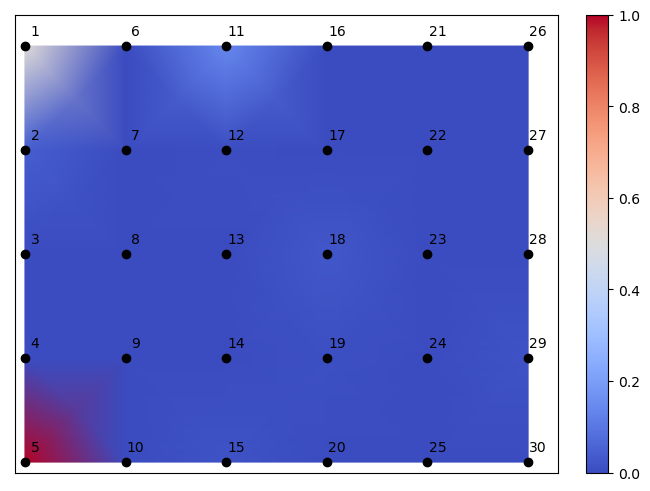

Scenario is: 6


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.00390625, 'Junta_6': 1.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0390625, 'Junta_10': 0.0078125, 'Junta_11': 0.73046875, 'Junta_12': 0.0, 'Junta_13': 0.015625, 'Junta_14': 0.0, 'Junta_15': 0.0234375, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.0, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.00390625, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


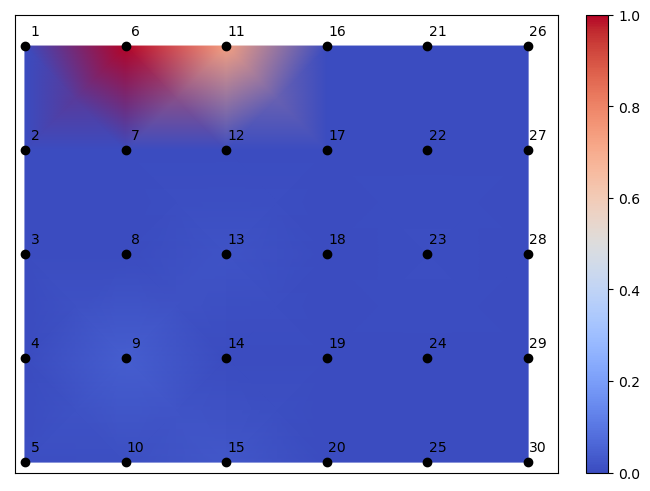

Scenario is: 7


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.1953125, 'Junta_3': 0.0, 'Junta_4': 0.0078125, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.98828125, 'Junta_8': 0.078125, 'Junta_9': 0.1796875, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0546875, 'Junta_13': 0.0, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.00390625, 'Junta_19': 0.1484375, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.02734375, 'Junta_28': 0.0, 'Junta_29': 0.0, 'Junta_30': 0.0}


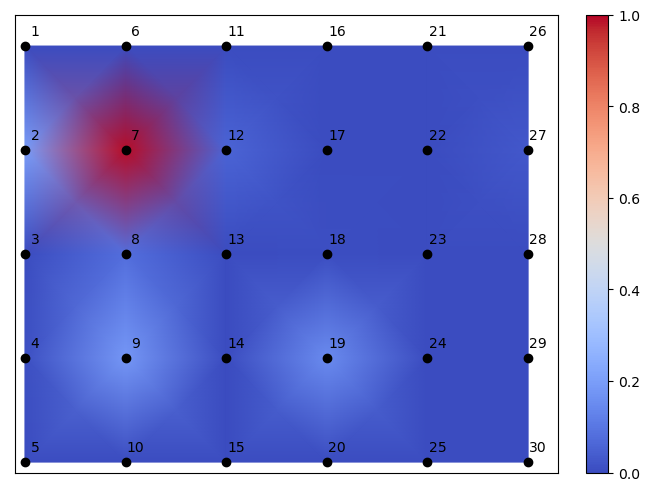

Scenario is: 8


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.09375, 'Junta_3': 0.0, 'Junta_4': 0.00390625, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0234375, 'Junta_8': 0.99609375, 'Junta_9': 0.046875, 'Junta_10': 0.04296875, 'Junta_11': 0.0, 'Junta_12': 0.1796875, 'Junta_13': 0.5703125, 'Junta_14': 0.02734375, 'Junta_15': 0.01171875, 'Junta_16': 0.0, 'Junta_17': 0.0546875, 'Junta_18': 0.0, 'Junta_19': 0.01171875, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0390625, 'Junta_23': 0.01953125, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0390625, 'Junta_28': 0.0, 'Junta_29': 0.05859375, 'Junta_30': 0.0}


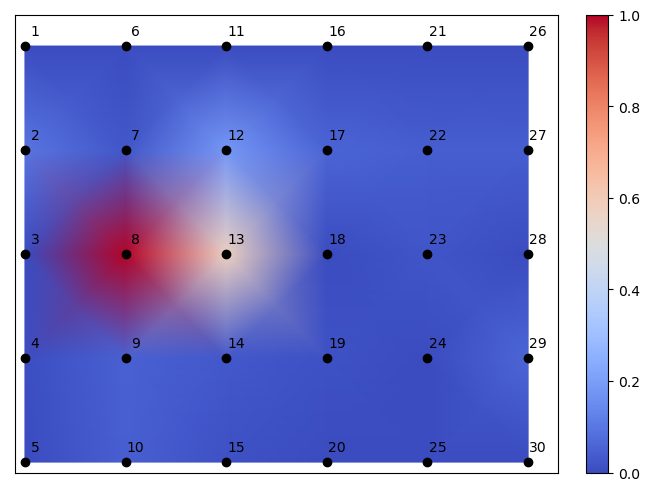

Scenario is: 9


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.0, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0234375, 'Junta_8': 0.0, 'Junta_9': 0.99609375, 'Junta_10': 0.09375, 'Junta_11': 0.0, 'Junta_12': 0.33984375, 'Junta_13': 0.23046875, 'Junta_14': 0.0234375, 'Junta_15': 0.19140625, 'Junta_16': 0.0, 'Junta_17': 0.0078125, 'Junta_18': 0.0, 'Junta_19': 0.0859375, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.01171875, 'Junta_30': 0.0}


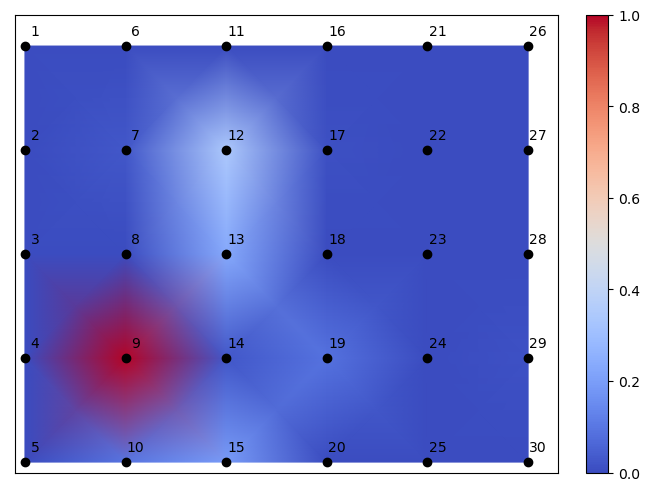

Scenario is: 0


  0%|          | 0/30 [00:00<?, ?it/s]

{'Junta_1': 0.0, 'Junta_2': 0.23046875, 'Junta_3': 0.0, 'Junta_4': 0.0, 'Junta_5': 0.0, 'Junta_6': 0.0, 'Junta_7': 0.0, 'Junta_8': 0.0, 'Junta_9': 0.0, 'Junta_10': 0.0, 'Junta_11': 0.0, 'Junta_12': 0.0, 'Junta_13': 0.00390625, 'Junta_14': 0.0, 'Junta_15': 0.0, 'Junta_16': 0.0, 'Junta_17': 0.0, 'Junta_18': 0.0, 'Junta_19': 0.03125, 'Junta_20': 0.0, 'Junta_21': 0.0, 'Junta_22': 0.0, 'Junta_23': 0.0, 'Junta_24': 0.0, 'Junta_25': 0.0, 'Junta_26': 0.0, 'Junta_27': 0.0, 'Junta_28': 0.0, 'Junta_29': 0.109375, 'Junta_30': 0.0}


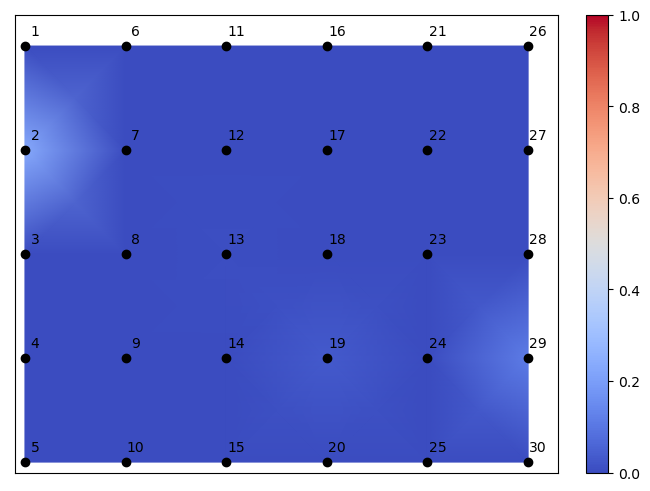

In [15]:
# path_used = pathB[0];
for path_used in tqdm(pathB):

    df_scenario = defs_.createDatabase(path_used);
    df_scenario = df_scenario.astype(float);

    # [index,    'Time',      'S1'  , ..., 'Scenario']
    # [  0,     0.000000,   0.004954, ...,     1.0   ]
    # [ ...,       ...,        ...  , ...,     ...   ]
    # [ 262k,   255.9999,  -0.211089, ...,     1.0   ]
    scenario = defs_.getDamageScenarioLabel(path_used);
    print('Scenario is: ' + str(scenario));

    pod_scenario = {};
    for i in tqdm(range(30)) :
        sensor = i+1;
        sensor_label = 'S'+ str(sensor);
        df_scenario_S1 = defs_.getRegressionCaracteristics(df_scenario,sensor_label,qty_coef=qty_coef);
        df_scenario_S1 = df_scenario_S1.astype(float);
        # [index,  'coeff_0_S1',  ...,  'coeff_0_S7']
        # [  0,    -0.354953579,  ...,  -0.237141094]
        # [ ...,        ...,      ...,      ...,    ]
        # [ 255,   -0.270663599,  ...,   0.004930247]

        X_scaled = df_scenario_S1;
        
        rf_ = rf_models["Sensor_S"+str(sensor)];

        y_pred = rf_.predict(X_scaled);
        pod_scenario["Junta_"+str(sensor)] = defs_.probabilityOfDamage(y_pred)

    print(pod_scenario)
    with open('pod_coef_30/pod_cenario_'+ str(scenario) +'.txt', 'w') as file:
        file.write(json.dumps(pod_scenario));

    def _annotate(ax, x, y, title):
        # this all gets repeated below:
        X, Y = np.meshgrid(x, y)
        ax.plot(X.flat, Y.flat, 'o', color='black')
        # ax.set_xlim(0.9, 5.3)
        # ax.set_ylim(0.9, 6.3)
        ax.set_xlim(0.9, 6.3)
        ax.set_ylim(0.9, 5.3)
        ax.set_title(title)

    array_total = [];

    for i in range(5):
        array_row = [];
        for j in range(6):
            junta = (j*5)+(5-i);
            array_row.append(pod_scenario["Junta_"+str(junta)]);
        array_total.append(array_row);

    x = [1,2,3,4,5,6];
    y = [1,2,3,4,5];

    fig, ax = plt.subplots(layout='constrained')
    pos = ax.pcolormesh(x, y, array_total, cmap='coolwarm', shading='gouraud', vmin=0, vmax=1);
    # shading=gouraud;
    _annotate(ax, x, y, '')

    annotations = []
    for q in range(30):
        annotations.append(str(q+1));    
    for t, label in enumerate(annotations):
        plt.annotate(label, (x[t//5] + 0.1, y[4 - t%5] + 0.1), ha='center');
    fig.colorbar(pos, ax=ax);
    plt.xticks([])
    plt.yticks([])
    plt.savefig('pod_images/pod_scenario_'+str(scenario)+'.png');
    plt.show()